**Calcular es alcanza máximo para lanzamiento parabólico con parámetros iniciales:**

\begin{equation}
v_{0}=15 [m/s]\\
\theta_{0}=45^o\\
x_{0}=y_{0}=0
\end{equation}

**El alcance máximo teórico puede ser calculado con la siguiente expresión:**
\begin{equation}
 X_{max}=\frac{V_{0}^{2}sen\left ( 2\theta  \right )}{g}
\end{equation}

\begin{equation}
 X_{max}=\frac{15^{2}sen\left ( 90^{^{o}}  \right )}{2\left ( 9.8 \right )}=22.9591[m]
\end{equation}

In [1]:
from math import sin,cos, pi, sqrt
from numpy import arange
from pylab import plot,xlabel,ylabel,show,xlim,ylim,legend,grid

In [2]:
def ace(x,t):
    g=9.8 #m/s
    return -g

In [3]:
a = 0.0    #inicio del intervalo
b = 3.0   #final del intervalo
N = 300  # numero de pasos
h = (b-a)/N # tamaño de un paso
 
# Euler
tpoints = arange(a,b,h)
Vpoints= []
Xpoints= []
Ypoints= []

the=(45*pi)/180
V0=15 #m/s
Vx=V0*cos(the)   
Vy=V0*sin(the)   
y=0
x=0

for t in tpoints:
    v =sqrt(Vx*Vx+Vy*Vy)
    Vpoints.append(v)
    Ypoints.append(y)
    Xpoints.append(x)
    Vy +=h*ace(x,t) 
    y +=h*Vy
    x +=h*Vx
     

In [40]:
for i in range (len(Ypoints)):
    if -0.5 < Ypoints[i] < 0.55 :
        pos=i
Xmax=Xpoints[pos]
print('Xmax=',Xmax)

Err=abs((Xmax-22.959)/22.959)
print('Error=',Err*100,'%')

Xmax= 23.33452377915615
Error= 1.6356277675689295 %


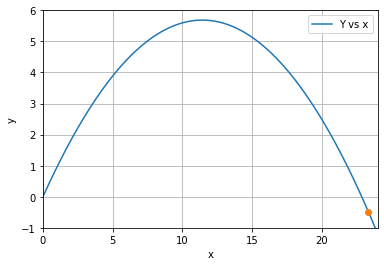

In [45]:
plot (Xpoints,Ypoints, label='Y vs x')
plot (Xpoints[220],Ypoints[220],'o')
legend()
xlim(0,24)
ylim(-1,6)
xlabel("x")
ylabel("y")
grid()
show()

In [6]:
#Runge-kutta

a = 0.0    #inicio del intervalo
b = 10.0   #final del intervalo
N = 300  # numero de pasos
h = (b-a)/N # tamaño de un paso

V= []
X= []
Y= []

the=(45*pi)/180
V0=15 #m/s
Vx=V0*cos(the)   
Vy=V0*sin(the)   
y=0
x=0

for t in tpoints:
    v =sqrt(Vx*Vx+Vy*Vy)
    V.append(v)
    Y.append(y)
    X.append(x)
    
    k1v =h*ace(x,t)
    k2v =h*ace(x+0.5*h,t+0.5*k1v)
    k3v =h*ace(x+0.5*h,t+0.5*k2v)
    k4v =h*ace(x+h,t+k3v)
    Vy +=(1/6)*(k1v+2*k2v+2*k3v+k4v)
    
    y +=h*Vy
    x +=h*Vx

In [33]:
for i in range (len(Y)):
    if -0.5 < Y[i] < 0.5 :
        pos=i
Xmax2=X[pos]
print('Xmax=',Xmax2)

Err2=abs((Xmax2-22.959)/22.959)

print('Error=',Err2*100,'%')

Xmax= 22.98097038856277
Error= 0.09569401351439911 %


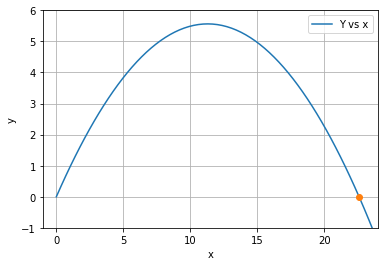

In [46]:
plot (X,Y, label='Y vs x')
plot (X[64],Y[64],'o')
legend()
xlim(-1,24)
ylim(-1,6)
xlabel("x")
ylabel("y")
grid()
show()

**Es posible observar que el método de Runge-Kutta de cuarto orden da resultados con un error menor que los arrojados por el método de Euler usando el mismo número de pasos en ambos métodos**